# Is Amazon Degradation Increasing?
#### _An Exploratory Data Analysis of Amazon Deforestation in Brazil_

<font color="firebrick"><b>acho que poderia ser: what does the data tell us about amazon deforestation?</b></font> 

### Introduction

This kernel will analyse datasets of two different programs of [INPE](http://www.inpe.br/dados_abertos/).

- 1. BDQ (Banco de Dados de Queimadas, or Fires Database): 
    - Methodology: detects **fire outbreaks** through satellite images, updated every 3 hours.
    - Data: amount of fire outbreaks by state, month and year, from 1999 to 2019.
    - Data obtainment: The data were extracted on December 13th 2019, always from the filtering for the reference salellite, aggregated using Postgres SQL and can be found in [kaggle](https://www.kaggle.com/mbogernetto/fires-in-the-brazilian-amazon-1999-to-2019-inpe).


- 2. PRODES (Programa de Monitoramento da Floresta Amazônica Brasileira por Satélite, or Brazilian Amazon Rainforest Monitoring Program by Satellite):
    - Methodology: PRODES maps primary **forest loss** using satellite imagery, with 20 to 30 meters of spatial resolution and 16-day revisit rate, in a combination that seeks to minimize the problem of cloud cover and ensure interoperability criteria.
    - Data: Deforestation area (km²) by year and state, from 2004 to 2019.
    - Data obtainment: The data were extracted from [PRODES](http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/prodes) on December 16th. It was already aggregated, so, no data process was made.
    
    
**It is important to note that there are many other forest biomes in Brazil in the same kind of danger, and also that Amazon is not only above Brazilian territory.** 

Feedback is extremly welcome. I hope you enjoy this work and can get some useful insight or piece of code from it.


### Context <font color="firebrick"><b>ualization</b></font>

The Amazon rainforest is a moist broadleaf tropical rainforest in the Amazon biome that covers territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. The total area is 5,500,000 square kilometres (2,123,562 square miles).

<img src="https://cdn-cf.tucantravel.com/images/Experiences/WILDLIFE_HOLIDAY_TOURS/AMAZON-JUNGLE-MAP-IN-SOUTH-AMERICA.jpg" alt="Fires in Brazilian Amazon rainforest" class="center">

<center align="center"><b>Figure 1</b>: Amazon rainforest in South America (represented in <b><font color="green">green</font></b>). Source: <a href='www.google.com'>Google</a></center> 

Specifically in Brazil, the Amazon forest covers the territory of 9 of its states. They are: Acre, Amapa, Amazonas, Maranhao, Mato Grosso, Para, Rondonia, Roraima and Tocantins. The map below shows where each state is located in the country. TABLEAU was used to build this map.

<font color="firebrick"><b>já tem coisa demais e essa aqui tem que sair. a figura logo a cima já mostra quase a mesma coisa</b></font>

In [2]:
# %%HTML
# <div class='tableauPlaceholder' id='viz1576427762525' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Br&#47;BrazilianLegalAmazonBrazilianAmazonFires&#47;DashboardBrazilMap&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='BrazilianLegalAmazonBrazilianAmazonFires&#47;DashboardBrazilMap' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Br&#47;BrazilianLegalAmazonBrazilianAmazonFires&#47;DashboardBrazilMap&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1576427762525');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='620px';vizElement.style.height='557px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='620px';vizElement.style.height='557px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<center align="center"><b>Figure 2</b>: Brazilian states in which there is Legal Amazon (represented in <b><font color="green">green</font></b>).</center> 

The region provides important benefits to communities living near and far. Nearly 500 indigenous communities call the Amazon rainforest home. It’s a highly biodiverse ecosystem, home to untold species of plants and animals. The rainforest can create its own weather and influence climates around the world. Unfortunately, the fragile ecosystem faces the constant threat of deforestation and fires (for natural or anthropogenic causes).

<img src="https://www.dw.com/image/50112402_303.jpg" alt="Fires in Brazilian Amazon rainforest" class="center">

<center align="center"><b>Figure 3</b>: Fires in Brazilian Amazon rainforest. Source: <a href='https://www.dw.com/en/brazil-forest-fires-rage-as-farmers-push-into-the-amazon/a-50116455'>DW</a></center> 

Deforestation happens for many reasons, such as illegal logging, agriculture, natural disasters, urbanization and mining. There are several ways to remove forests - burning and logging are two methods. Although deforestation is happening all over the world today, it is an especially critical issue in the Amazon rainforests, as the only large forest still standing in the world. There, the species of plants and animals they harbor have been disappearing at an alarming rate. Source: [INPE](http://www.inpe.br/)

### Objectives

The importance of the Amazon rainforest for the balance of the world environment is unquestionable. This kernel will analyze the deforestation in the 9 Brazil states where Amazon biome can be found through the analysis of two INPE programs (amount of fire outbreaks of BDQ, and deforestation area of PRODES).

<font color="firebrick"><b>This kernel's objective is to study Amazon deforestation is increasing and it won't try to find answers on the reasons why it is happening</b></font>

<font color="firebrick"><b>Acho que da pra reescrever aqui, não gostei da forma que tá. faz lista das coisas que tu analizou no jupyter como perguntas. tipo 1. Qual o efeito do el nino/la nina?</b></font>

This kernel can not make conclusions on the reasons why the Amazon fires are happenning, as the data is only about the amount of fire outbreaks. So, the question we want to answer with this analysis is: **Is Bazilian Amazon deforestation increasing?** <font color="firebrick"><b>bazilian</b></font>

<font color="firebrick"><b>Acho que a contextualização poderia ser o capítulo 1 e não parte da introdução, a introdução tem que ser curta pra convidar a pessoa a ler e tem mt coisa na tua. Vai assustar as pessoas. A contextualização como capitulo fica mais opcional pra leitura</b></font>

---
---

# 1 - Fires outbreaks (BDQ)

## 1.1 - Introducing the Data <font color="firebrick"><b>Dataset Summary</b></font>

### General information

- Original dataset shape:
    - Format: CSV
    - Number of files: 21 (one per year) <font color="firebrick"><b>acho q n precisa</b></font>
    - Number of rows: 2456247 (total)
    - Number of columns: 12 (in Portuguese, translated to English below): 
        - datahora = datetime
        - satelite = satellite
        - pais = country
        - municipio = city
        - bioma = biome
        - diasemchuva = days without rain
        - precipitacao = rainfall
        - riscofogo = risk of fire
        - latitude = latitude
        - longitude = longitude
        - frp = fire radiative power
        
<font color="firebrick"><b>Põe isso em baixo no capitulo do SQL</b></font>

- Aggregated dataset shape: 
    - Format: CSV
    - Number of rows: 2104
    - Number of columns: 6
    
### Features in the dataset

The original dataset was aggregated using SQL, and the final dataset has the following features:

- **year**: Year of occurrence
- **month**: Month of occurrence
- **state**: State of occurrence
- **latitude**: Average latitude of all occurrences in this month, year and state
- **longitude**: Average longitude of all occurrences in this month, year and state
- **firespots**: Number of forest fire outbreaks

---

## 1.2 - Data preparation using SQL

Since the original data had too many rows, the first thing I did was to process them using PostgresSQL and select only the data I wanted.

I aggregated the fire outbreaks by year, month and state, counting the number of occurrences and taking to average of latitude and longitude.

The code used in SQL was as follows:

```SQL
SELECT 
    EXTRACT(YEAR FROM datahora) as year,
    EXTRACT(MONTH FROM datahora) as month,
    estado as state,
    AVG(latitude) as latitude,
    AVG(longitude) as longitude,
    COUNT(estado)  as firespots
    
FROM south_america_fires 

GROUP BY 
    EXTRACT(YEAR FROM datahora), 
    EXTRACT(MONTH FROM datahora), 
    estado

ORDER BY year;
```

---

## 1.3 - Importing Libraries and Reading the Data

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

%matplotlib inline

In [2]:
# Different encoding to read brazilian data
amazonfires = pd.read_csv("inpe_brazilian_amazon_fires_1999_2019.csv", encoding='LATIN1')

In [3]:
amazonfires.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


<font color="firebrick"><b>Tirei as coisas que tinham aqui e botei nas celulas onde são usadas pra deixar mais organizado. Não sei se precisa converter essa coluna pra data, acho que não usa em nenhum lugar.</b></font>

In [4]:
# Transforming the column year from integer to date
# amazonfires['year'] = pd.to_datetime(amazonfires['year'], format="%Y") 

---
---

## 1.4 - Data Analysis

### 1.4.1 - An overview

First, I want to analyse the situation in an overview, detecting the fire outbreaks by year, month and state.

#### **Year**

The graph below shows the **sum** of fire outbreaks in Amazon detected by INPE for each year since 1999. The confidence band is of 95%.

It seems that, overall, the number of fire outbreaks in the Amazon had a really important peak in 2002 and, after this year, decreased little by little until 2011. From this point to today, a little increase in the number of fires outbreaks can be noted. 

Please note that the data from 2019 is not complete, since it was extracted at December 13th 2019.

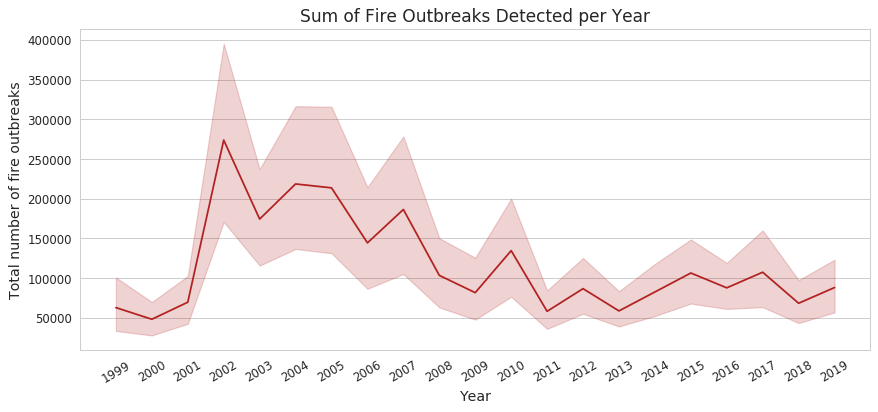

In [5]:
# Generating years for the graph axis labels
int_year = list(range(1999, 2020))

plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.lineplot(data=amazonfires, x='year', y='firespots', estimator='sum', color="firebrick")

plt.ylabel("Total number of fire outbreaks", size="large")
plt.xlabel("Year", size="large")
plt.xticks(int_year, rotation=30)
plt.title("Sum of Fire Outbreaks Detected per Year", size="x-large")
plt.grid(axis='x')

#### **Month**

The graph below shows the **average** of fire outbreaks in Amazon detected by INPE for each month in the range of 1999 to 2019. The confidence band is of 95%.

The graph shows that the second semester of the year, in average is the most affected by fire outbreaks, the top 3 being September, August and October.

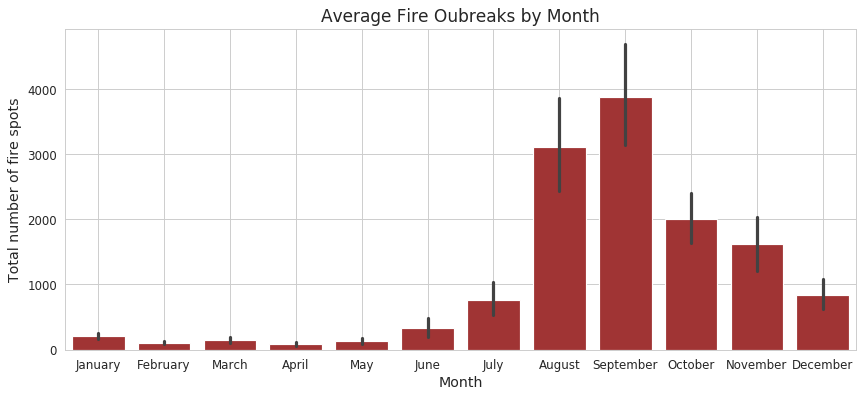

In [9]:
# Month names in full length
fullmonth = ['January', 'February', 'March', 'April', 'May', 'June',
             'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

#sns.lineplot(data=amazonfires, x='month', y='firespots', color="firebrick")    
sns.barplot(data=amazonfires, x='month', y='firespots', color="firebrick")

plt.ylabel("Total number of fire spots", size="large")
plt.title("Average Fire Oubreaks by Month", size="x-large")
plt.xlabel("Month", size="large")
plt.xticks(ticks=amazonfires['month'].unique()-1, labels=fullmonth)
plt.grid(axis='x');

#### **State**

It is also important to know which states are the most affected by the fires. The figure below shows the **sum** of fire outbreaks for each state for all the years in the dataset. **Para** and **Mato Grosso** are the most affected states in Brazil by the Amazon fires, **having at least twice the amount of fire outbreaks of others combined.**

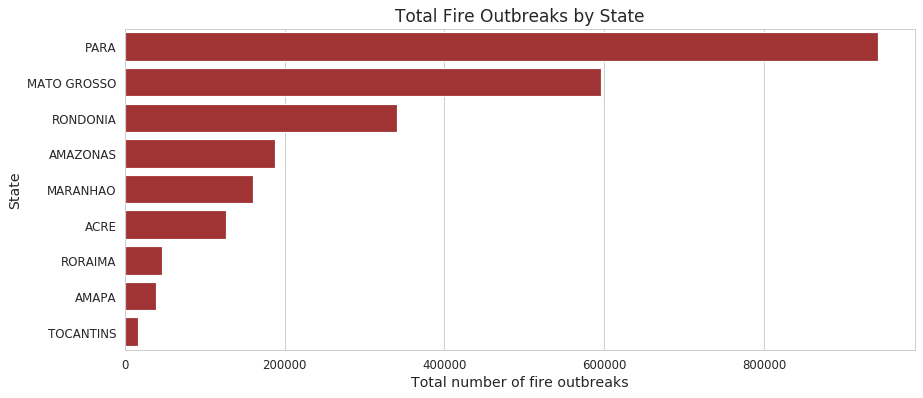

In [11]:
legal_amazon = (
    amazonfires[['state','firespots']].groupby('state',as_index=False)
    .sum().sort_values('firespots',ascending=False)['state'].values
)

plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.barplot(data=amazonfires, x='firespots', y='state', estimator=sum, color='firebrick', order=legal_amazon, ci=None)    

plt.ylabel("State", size="large")
plt.title("Total Fire Outbreaks by State", size="x-large")
plt.xlabel("Total number of fire outbreaks", size="large");

---

### 1.4.2 - Combining features

Having a better grasp of the problem and the current situation. It's time to dig deeper into the data.

#### **State and Year**

Let's analyse these two features together. How is the behavior of each state over the years?

The graphs below show the **sum** of fire outbreaks for each state (confidence band of 95%).

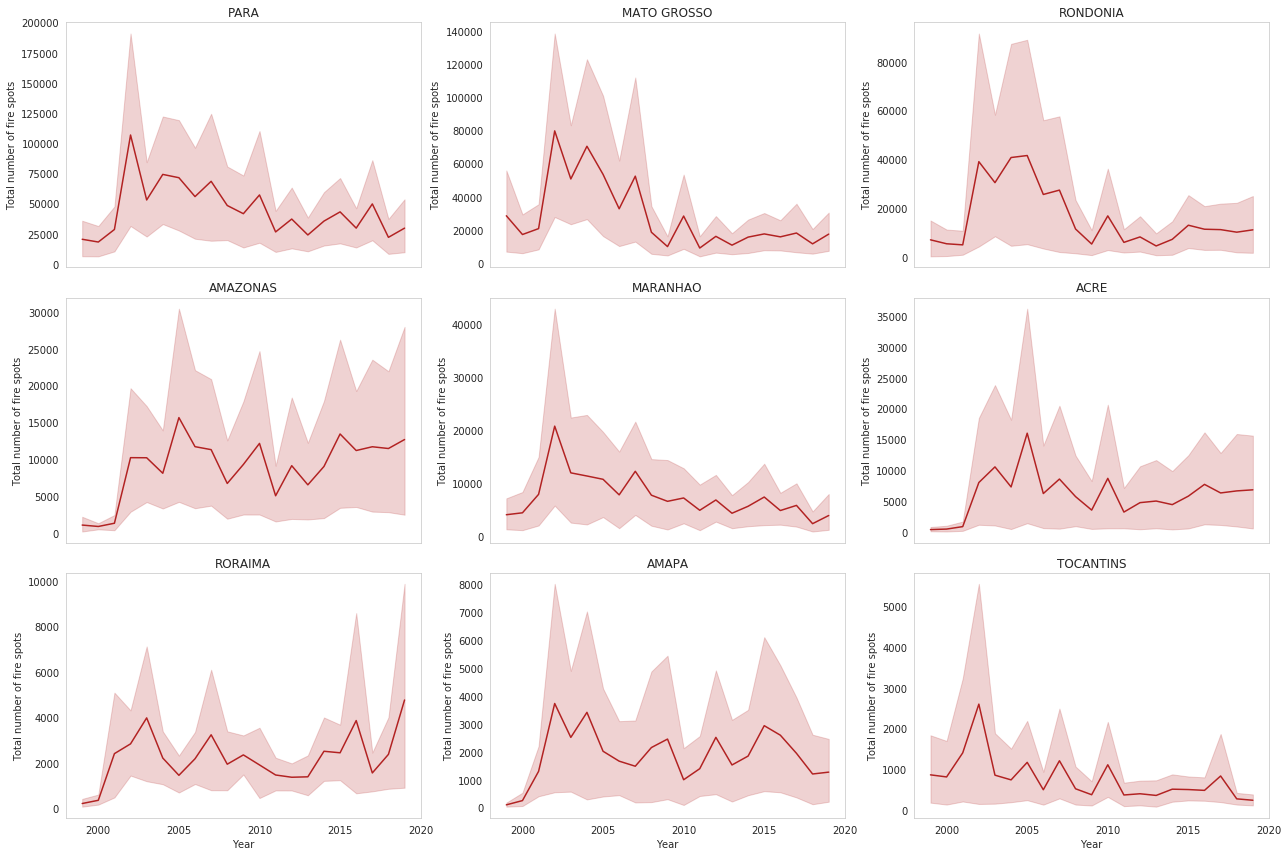

In [12]:
legal_amazon = (
    amazonfires[['state','firespots']].groupby('state',as_index=False)
    .sum()
    .sort_values('firespots',ascending=False)['state']
    .values
)

fig, ax = plt.subplots(3, 3, figsize=(18, 12), sharex=True)
sns.set_style("whitegrid")
ax = ax.flat

i=0
for x in legal_amazon:
    sns.lineplot(data=amazonfires[amazonfires['state'] == x], x='year',
                 y='firespots', estimator='sum', ax=ax[i], color='firebrick')
    ax[i].set_title(x)
    ax[i].set_ylabel("Total number of fire spots")
    ax[i].set_xlabel("Year")
    ax[i].set_xticks([2000, 2005, 2010, 2015, 2020])
    ax[i].grid(False)
    
    i += 1
    
plt.tight_layout()

**Insights from graph:**
- It seems that the peak we had previously noted in 2002 was mainly affected<font color="firebrick"><b>(caused)</b></font> by the fires in Para, Mato Grosso and Rondonia. These 3 states <font color="firebrick"><b>had a peak in 2002</b></font>had the behavior of a peak in 2002 and gradually decrease fire outbreaks numbers until 2011. <font color="firebrick"><b>mudei essa ultima frase um pouco</b></font>

- Maranhao, Acre and Tocantins show this same behavior, but on a smaller scale.

- Amazonas does not seem to have the same behavior. <font color="firebrick"><b>A dispersão é enorme pro amazonas. eu não concluiria isso, concluiria simplesmente que é mt disperso e n dá pra tirar mts conclusões</b></font>For this state, the outbreaks of fire decrease from 2002 to 2011, and then increase again, reaching close to the worst months so far. Same thing for Roraima, which rechead the largest amount of fire outbreaks in 2019.

- Amapa does not show a clear behavior. <font color="firebrick"><b>Acho que da pra concluir pra esses dois ultimos itens que a dispersão é bem alta e dificil de identificar tendências</b></font>

#### **State and month**

Now let's take a look in the fire outbreak's behavior throughout the year. The graphs below show the **average** of outbreaks per month for each state.

The fire outbreaks seem to be concentrated in the second semester of the years for all states, except for Roraima, which is weird. For this state, the peak in fire outbreaks seems to be lagging in a few months, starting softly in October and peaking in March of the following year.

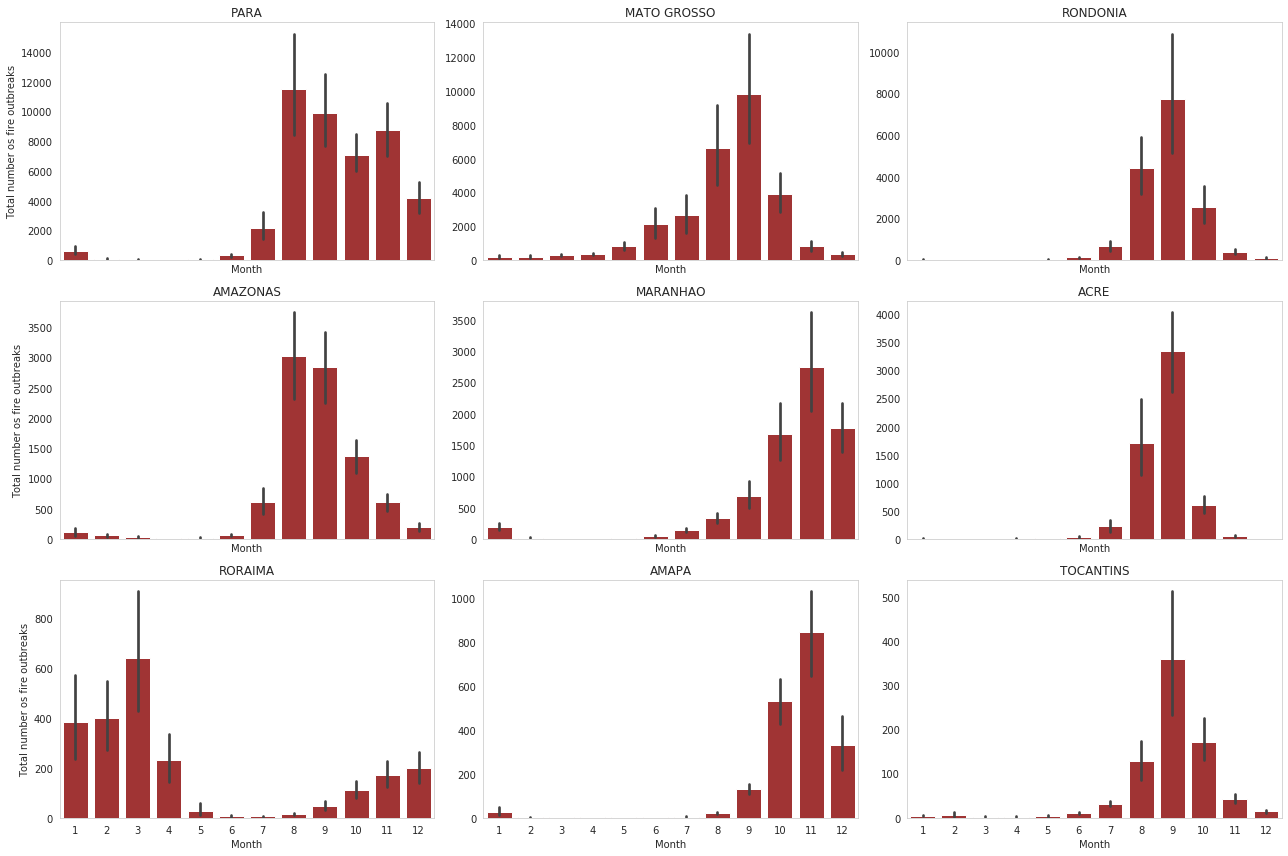

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(18, 12), sharex=True)
sns.set_style("whitegrid")
ax = ax.flat

i=0
for x in legal_amazon:
    #sns.lineplot(data=amazonfires[amazonfires['state'] == x], x='month',
    #            y='firespots', ax=ax[i], color='firebrick')
    sns.barplot(data=amazonfires[amazonfires['state'] == x], x='month',
                y='firespots', ax=ax[i], color='firebrick')
    ax[i].set_title(x)
    ax[i].set_xlabel("Month")
    ax[i].grid(False)
    if x in ['PARA', 'AMAZONAS', 'RORAIMA']:
        ax[i].set_ylabel("Total number os fire outbreaks")
    else:
        ax[i].set_ylabel("")
    
    i += 1
  
    
plt.tight_layout();

<font color="firebrick"><b>In order to know more ...</b></font>As I wanted to know more about the peak month in each state, I <font color="firebrick"><b>put this information in a map using Tableau:</b></font>built the following map using Tableau:

<font color="firebrick"><b>Acho que podia botar os valores nas tooltips, é um gráfico sem numero nenhum</b></font>

In [27]:
%%HTML
<div class='tableauPlaceholder' id='viz1576427659329' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;am&#47;amazon-fires-map&#47;DashboardMonthofpeak&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='amazon-fires-map&#47;DashboardMonthofpeak' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;am&#47;amazon-fires-map&#47;DashboardMonthofpeak&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1576427659329');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='620px';vizElement.style.height='557px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='620px';vizElement.style.height='557px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**From this map we can see that:**
- The southernmost states, which are continental, have their peak in fire outbreaks in September. They are: Acre, Rondonia, Mato Grosso and Tocantins.
- Maranhao and Amapa have their peak in November. They are both states on the coast. 
- Para is also on the coast, and if you analyse the bar plots above, this state has actually two peaks: the biggest in August, together with Amazonas, and the other in November, with the coastal states. <font color="firebrick"><b>Para has a large territory and apparently has similarities with Amazonas and the coastal states.</b></font>Maybe these peaks refer to different fire clusters locations, one in the continental part of the State, and the other on the coast.
- As previously noted, Roraima has a <font color="firebrick"><b>different behavior</b></font>very isolated behavior, with a lag of a few months <font color="firebrick"><b>when compared to the other states.</b></font>to the peak of fire outbreaks in March.

---

#### **Year, Month and State**

It is interesting to note what is the behavior per month and how it is changing over the years. The heatmaps below show the amount of fire outbreaks over the years, for each month of the year for each state.

The color scale is not shared, so we can better see the individual behavior for each state.

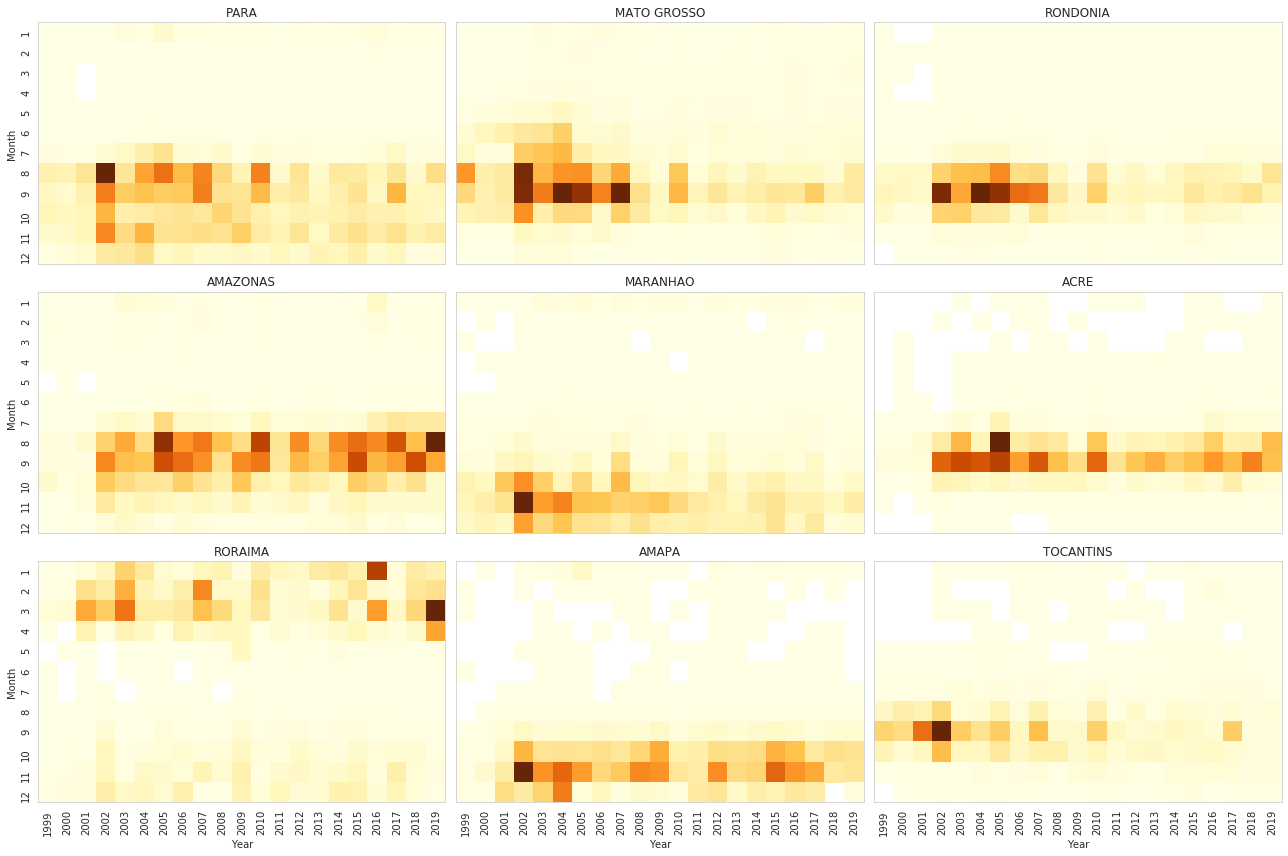

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
ax = ax.flat

i=0
for x in legal_amazon:
    st_month_year_pivot = amazonfires[amazonfires['state'] == x].pivot_table(values='firespots', index='month', columns='year', aggfunc='sum')
    
    sns.heatmap(data=st_month_year_pivot, xticklabels=int_year, ax=ax[i], cmap='YlOrBr', cbar=False)
    
    ax[i].set_ylabel("Month")
    ax[i].set_xlabel("Year")
    ax[i].set_title(x)
    
    for _, spine in ax[i].spines.items():
        spine.set_visible(True)
        
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
    
    i += 1
    

for a in [ax[0], ax[3], ax[6]]:
    a.yaxis.set_visible(True)
    
for a in [ax[6], ax[7], ax[8]]:
    a.xaxis.set_visible(True)
    
    
plt.tight_layout(); #automatically organize the figures

**Insights from the plot**:
- Amazonas showed an outlier<font color="firebrick"><b> a peak</b></font> in 2019 in August. The heatmap shows that the amount of fire outbreaks recorded in this month <font color="firebrick"><b>is</b></font> above the average for this period of the year (<font color="firebrick"><b>the highest since 1999</b></font>in fact, being a record overall), which may indicate the presence of burns due to anthropogenic<font color="firebrick"><b>unnatural</b></font> causes.

- Roraima showed a similar behavior in March 2019. This amount of fires in this month was above average for this period of the year and marked the month with the largest number of fire spots in this State history <font color="firebrick"><b>since 1999</b></font>.

- No other state has shown much unexpected behavior on the other charts for 2019. <font color="firebrick"><b>acho q pode tirar essa linha</b></font>

- Para and Amazonas are the states with the largest band<font color="firebrick"><b>q q é band?</b></font> of fire outbreaks throughout the year, with the 'fire period' reaching almost an entire semester. These are also the largest states of the Legal Amazon, in terms of area. <font color="firebrick"><b>n vejo necessidade dessa conclusão</b></font>

- Para, Mato Grosso, Rondonia, Maranhao and Tocantins show important reductions in the number of fire outbreaks compared to the early years of data collection. Amazonas, Acre, Roraima and Amapa do not show the same behavior. <font color="firebrick"><b>Talvez simplesmente nao tenha mais o q queimar lá de interessante para o agronegócio</b></font>

Let's see now how is each month changing throughout the years, for all states.

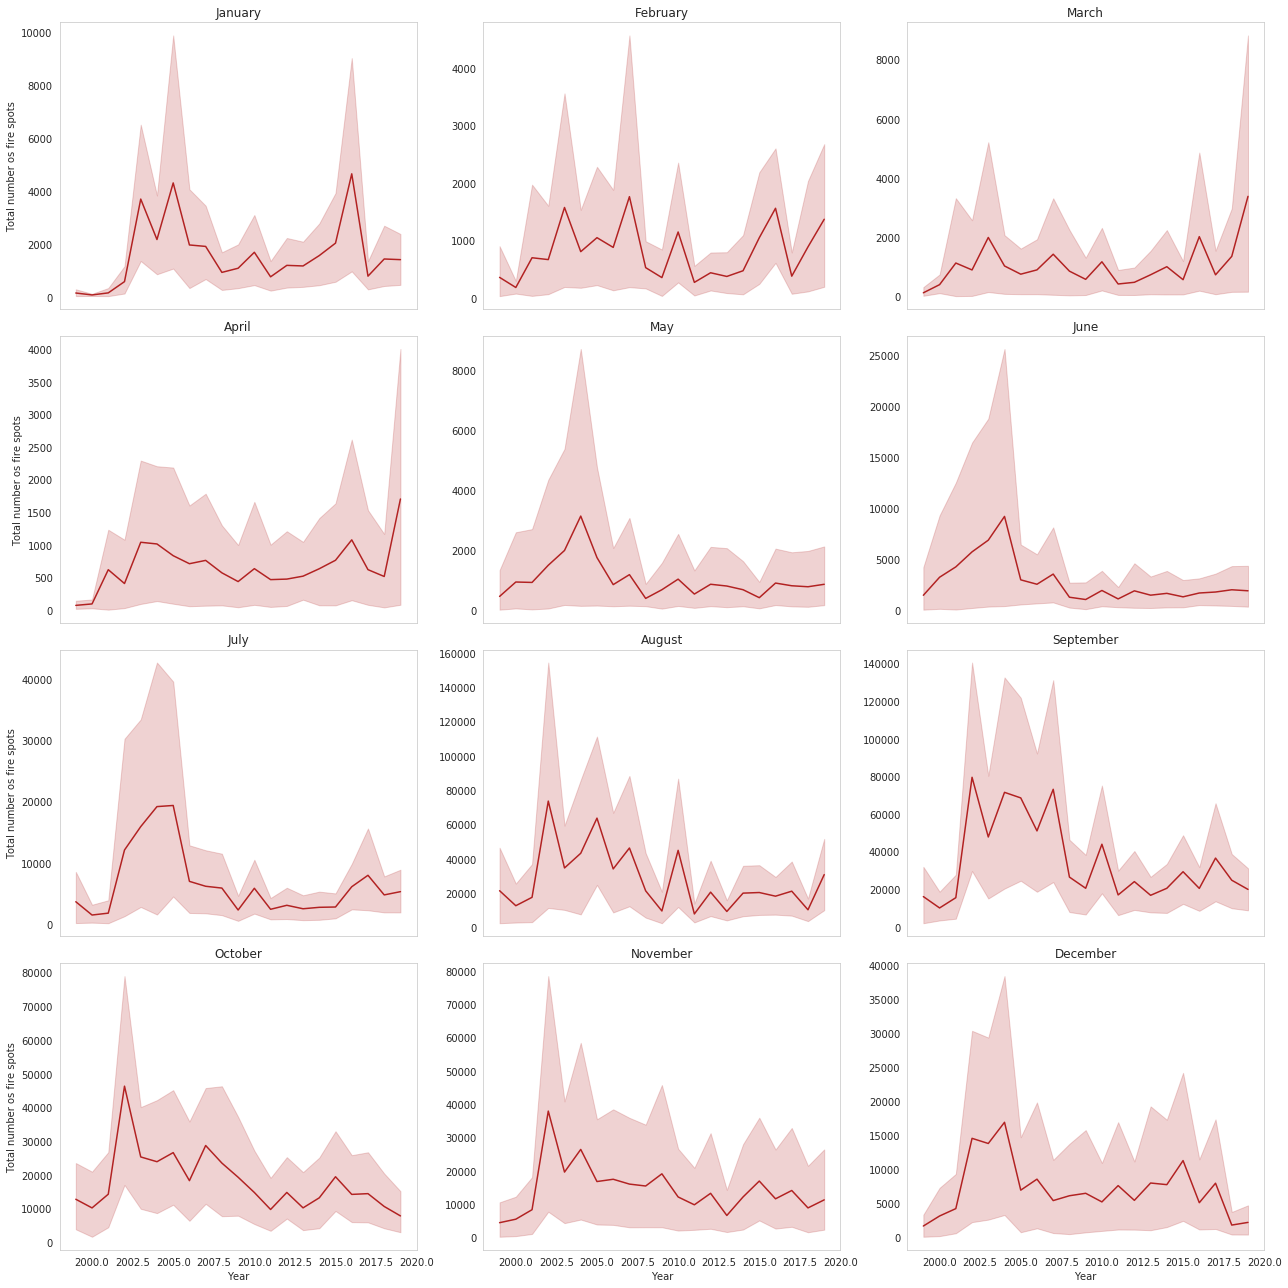

In [15]:
fig, ax = plt.subplots(4, 3, figsize = (18,18), sharex=True)
sns.set_style("whitegrid")
ax = ax.flat

i=0
for x in fullmonth:
    sns.lineplot(data=amazonfires[amazonfires['month'] == i+1], x='year', y='firespots', estimator='sum', color="firebrick", ax=ax[i])
    ax[i].set_title(x)
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("")
    ax[i].grid(False)
    
    i = i+1
    
for i in [0, 3, 6, 9]:
    ax[i].set_ylabel("Total number os fire spots")
    
plt.tight_layout(); #automatically organize the figures

<font color="firebrick"><b>Acho que não vale a pena esse gráfico. Dá pra por a conclusão de recordes pra março e abril como conclusão do plot anterior e remover ele. É gigante pra tirar só essa informação</b></font>

- The first thing to note is that March and April have broken records in the amount of fire outbreaks in 2019. Analyzing these graphs together with the heatmaps previouly shown, it is possible to conclude that these records are due to the fires in Roraima, which is the only state with the 'fire period' in the first semester of each year, and that in 2019, reached its record.
- December 2019 does not have all data, since they were extracted from the site during this month.

### 1.4.3 - <font color="firebrick"><b>Previous Years' Metrics</b></font>

I want to analyze the most recent years to the behavior of all others.<font color="firebrick"><b>I want to compare the most recent years with historical data</b></font>

<font color="firebrick"><b>To achieve this, </b></font>For this, the next plots show in the left 2017 represented in columns, vs the minimum, average and maximum of all previous years. An in the right plot, the maximum is represented by the 100% line, while the average and 2017 values are represented in relation to the maximum. 

The same graphs were made to 2018 and 2019.

<font color="firebrick"><b>Essa explicação tá confusa, da pra ler e reescrever</b></font>

In [16]:
def previous_years_metrics(ds, year):
    ds_grouped = (
        ds[ds['year'] < year].groupby(['year','month'])
        .sum()
        .groupby('month')
        .aggregate([min, max, np.mean])
    )['firespots']
    
    ds_grouped[f'{year}'] = ds[ds['year'] == year].groupby('month')['firespots'].sum()
    ds_grouped[f'{year}_max'] = (ds_grouped[f'{year}'] / ds_grouped['max']) *100
    ds_grouped['avg_max'] = (ds_grouped['mean'] / ds_grouped['max']) *100
    
    return ds_grouped

In [17]:
month_statistics_2017 = previous_years_metrics(amazonfires, 2017)
month_statistics_2018 = previous_years_metrics(amazonfires, 2018)
month_statistics_2019 = previous_years_metrics(amazonfires, 2019)

In [80]:
def plot_year_row(dataset, year, ax1, ax2):
    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    xticks = mtick.FormatStrFormatter(fmt)
    months = dataset.index
    
    ax1.bar(dataset.index, dataset[f'{year}'], align='center', color='whitesmoke', alpha=1, label=f"{year}", edgecolor='black', linewidth=1)
    sns.lineplot(data=dataset, x=dataset.index, y='min', color="goldenrod", lw=4, alpha=0.7, label="Minimum", ax=ax1)
    sns.lineplot(data=dataset, x=dataset.index, y='mean', color="orangered", lw=4, alpha=0.7, label="Average", ax=ax1)
    sns.lineplot(data=dataset, x=dataset.index, y='max', color="firebrick", lw=4, alpha=0.7, label="Maximum", ax=ax1)
    ax1.set_title(f"{year} vs Previous Years")
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Fire outbreaks")
    ax1.grid(False)
    ax1.set_xticks(months)
    ax1.set_xticklabels(months)
    ax1.legend(loc="upper left")

    ax2.bar(dataset.index, dataset[f'{year}_max'], align='center', color='whitesmoke', alpha=1, label=f"{year}", edgecolor='black', linewidth=1)
    sns.lineplot(data=dataset, x=dataset.index, y='avg_max', color="orangered", lw=4, alpha=0.7, label="Average", ax=ax2)
    ax2.axhline(y=100, color='firebrick', linestyle='-', lw=3.5, alpha=0.8, label="Maximum")
    ax2.set_title(f"{year} vs Previous Years (percentage of maximum)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Fire Outbreaks (% of maximum)")
    ax2.yaxis.set_major_formatter(xticks)
    ax2.grid(False)
    ax2.set_xticks(months)
    ax2.set_xticklabels(months)
    ax2.legend(loc="upper right")

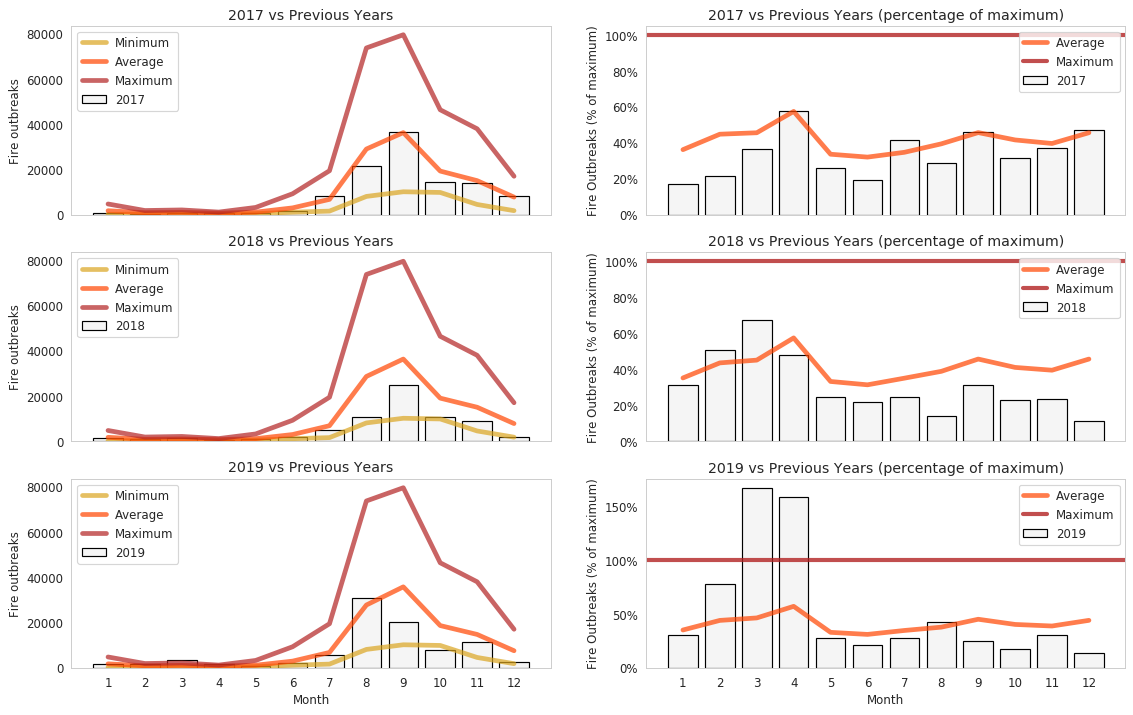

In [81]:
fig, ax = plt.subplots(3, 2, figsize = (16,10), dpi=85, sharex=True)
sns.set_style("whitegrid")
ax = ax.flat

plot_year_row(month_statistics_2017, 2017, ax[0], ax[1])
plot_year_row(month_statistics_2018, 2018, ax[2], ax[3])
plot_year_row(month_statistics_2019, 2019, ax[4], ax[5])

**Insights from this graph**:

- In **2017**, only July was above the average of fire outbreaks, April, September and December got close to it. The other months were below the average. No month has come close to the maximum.
- In **2018**, February and March had more fire outbreaks than the average of previous years. The rest of the months didn't come close to that.
- **2019** was the only of these years to surpass the maximum of previous years in March and April. Both had burnings above 150% of the maximum this year. Also, February and August reached the previous years' average for each month. The rest of the months were below average. Data from December is incomplete so it's not possible to analyse it yet.
- It is important to remember that these Maximum, Average and Minimum calculations include the early years of data collection, which had absurd numbers of fire outbreaks. Being comparable to these years should be a very serious problem. 

<font color="firebrick"><b>... calculations include the years around 2002 ~ 2004 which had unnaceptable amounts of firespots. We shouldn't use those years values to conclude that the situation is better now.</b></font>

<font color="firebrick"><b>Acho que esse ultimo item pode ir pra conclusão e não aqui</b></font>

### 1.4.3 Interactive Map

In order to have a better view of the location and amount of the fire outbreaks, as well as the variations over the years, I encourage you to play a little bit with the map below. You can pass the years through the slider and observe the color and size of the bubbles in each state.

In [82]:
%%HTML
<div class='tableauPlaceholder' id='viz1576428086247' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fi&#47;FireoutbreaksbyyearBrazilianAmazonFires&#47;DashboardBrAmazonFires&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FireoutbreaksbyyearBrazilianAmazonFires&#47;DashboardBrAmazonFires' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fi&#47;FireoutbreaksbyyearBrazilianAmazonFires&#47;DashboardBrAmazonFires&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1576428086247');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='620px';vizElement.style.height='557px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='620px';vizElement.style.height='557px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

---
---

# 2 - Deforestation Area (PRODES)

## 2.1 - Introducing the Data

### General information
- Format: CSV
- Number of rows: 16
- Number of columns: 11
    
### Features in the dataset
Data extracted from a Brazilian website. Features are in Portuguese. Data is already pivoted, will be unpivoted later.
- **Ano/Estados**: Year of occurrence
- **AC, AM, AP, MA, MT, PA, RO, RR, TO**: States of Legal Amazon
- **AMZ LEGAL**: Sum of all states
- Values: deforested area in **squared kilometers (km²)**.

---

## 2.2 - Reading the Data

In [136]:
# Different encoding due to brazilian data
pivot_amazon_def = pd.read_excel("def-area.xlsx", encoding='LATIN1')

pivot_amazon_def.drop('AMZ LEGAL', axis=1, inplace=True)

column_names = ["year", "ACRE", "AMAZONAS", "AMAPA", "MARANHAO",
                "MATO GROSSO", "PARA", "RONDONIA", "RORAIMA", "TOCANTINS"]

pivot_amazon_def.columns = column_names

pivot_amazon_def.head()

,year,ACRE,AMAZONAS,AMAPA,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS
0,2004,728,1232,46,755,11814,8870,3858,311,158
1,2005,592,775,33,922,7145,5899,3244,133,271
2,2006,398,788,30,674,4333,5659,2049,231,124
3,2007,184,610,39,631,2678,5526,1611,309,63
4,2008,254,604,100,1271,3258,5607,1136,574,107


Data are already pivoted, and I need them unpivoted.

In [95]:
amazon_def_area = pivot_amazon_def.melt(id_vars=['year'], var_name='state', value_name='defarea')
amazon_def_area.head()

,year,state,defarea
0,2004,ACRE,728
1,2005,ACRE,592
2,2006,ACRE,398
3,2007,ACRE,184
4,2008,ACRE,254


---

## 2.3 - Analysis

#### <font color="firebrick"><b>Changes through years</b></font>

The graph below shows the **sum** of deforested area (km²) in Brazilian Amazon for each year since 2004 with 95% confidence band.

First thing to note is that this graph is way more stable<font color="firebrick"><b> smooth</b></font> than fire outbreaks. It shows a very important peak in 2004, with values getting close to 30000 km² of deforestation. Then, tha numbers decrease and seem to stabilize, staying below 8000 km² of deforestation from 2009 to 2018. In 2019, however, this number reached 10000 km² again, which hasn't happened since 2008. <font color="firebrick"><b>muita dispersão, n da pra dizer isso. só se tu dizer explicitamente que a média chegou a 10k</b></font>

It is important to remember that the data from 2019 is not complete, since it was extracted during this month). <font color="firebrick"><b>não precisa falar de novo isso</b></font>

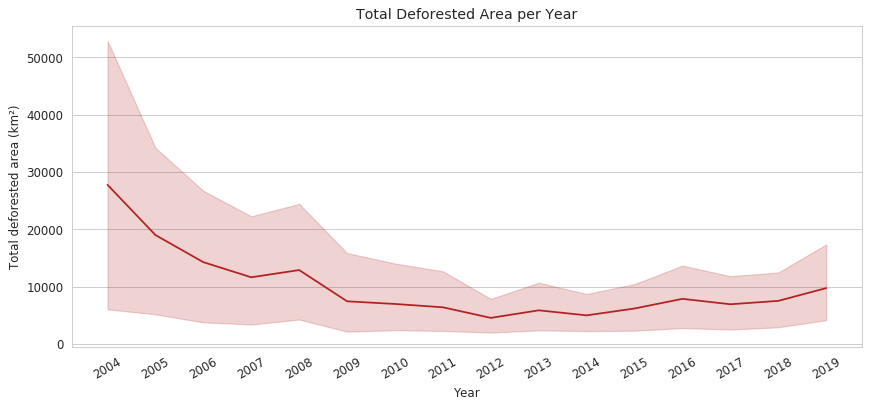

In [97]:
plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")
chart = sns.lineplot(data=amazon_def_area, x=amazon_def_area['year'], y=amazon_def_area['defarea'], estimator='sum', color="firebrick")
plt.ylabel("Total deforested area (km²)")
plt.xlabel("Year")
plt.xticks(amazon_def_area.year.unique(), rotation=30)
plt.title("Total Deforested Area per Year")
plt.grid(axis='x');

I think this chart may not be the best to represent the degradation of the Amazon rainforest. <font color="firebrick"><b>Não é nem questão de "I think", acho que talvez nem precise esse gráfico de cima porque ele dá a impressão que tá "diminuindo" enquanto desmatamento é algo que só aumenta. Os valores são m² - a "taxa" de desmatamento. No gráfico de baixo da pra ver que a derivada diminui um pouco até 2011 e dá a impressão de que começa a aumentar de novo mais pra 2019</b></font>

When a part of the forest is deforested (by burning, logging or any other mothod), it will hardly be recovered. First, because the space will probably be used for agriculture, livestock or mining. Second, because if an attempt is made to recover it, it would take at least a hundred years for it to regenerate with all the fauna and flora it once housed.

Let's look at this chart, accumulated by year.

#### **Cummulative Sum**

<font color="firebrick"><b>Essa célula faz a mesma coisa q a tua de baixo</b></font>

In [137]:
pivot_amazon_def['total'] = 0
pivot_amazon_def["total_cummulative"] = 0
pivot_amazon_def["total"] = pivot_amazon_def.drop("year", axis=1).sum(axis=1)
pivot_amazon_def["total_cummulative"] = pivot_amazon_def.total.cumsum()

In [126]:
# pivot_amazon_def_area_acc = pivot_amazon_def.copy()

# pivot_amazon_def_area_acc['ACRE'] = np.cumsum(pivot_amazon_def['ACRE'])
# pivot_amazon_def_area_acc['AMAZONAS'] = np.cumsum(pivot_amazon_def['AMAZONAS'])
# pivot_amazon_def_area_acc['AMAPA'] = np.cumsum(pivot_amazon_def['AMAPA'])
# pivot_amazon_def_area_acc['MARANHAO'] = np.cumsum(pivot_amazon_def['MARANHAO'])
# pivot_amazon_def_area_acc['MATO GROSSO'] = np.cumsum(pivot_amazon_def['MATO GROSSO'])
# pivot_amazon_def_area_acc['PARA'] = np.cumsum(pivot_amazon_def['PARA'])
# pivot_amazon_def_area_acc['RONDONIA'] = np.cumsum(pivot_amazon_def['RONDONIA'])
# pivot_amazon_def_area_acc['RORAIMA'] = np.cumsum(pivot_amazon_def['RORAIMA'])
# pivot_amazon_def_area_acc['TOCANTINS'] = np.cumsum(pivot_amazon_def['TOCANTINS'])

# pivot_amazon_def_area_acc['acc_total'] = 0
# pivot_amazon_def_area_acc['acc_total'] = np.sum(pivot_amazon_def_area_acc.drop('year',axis=1), axis=1)

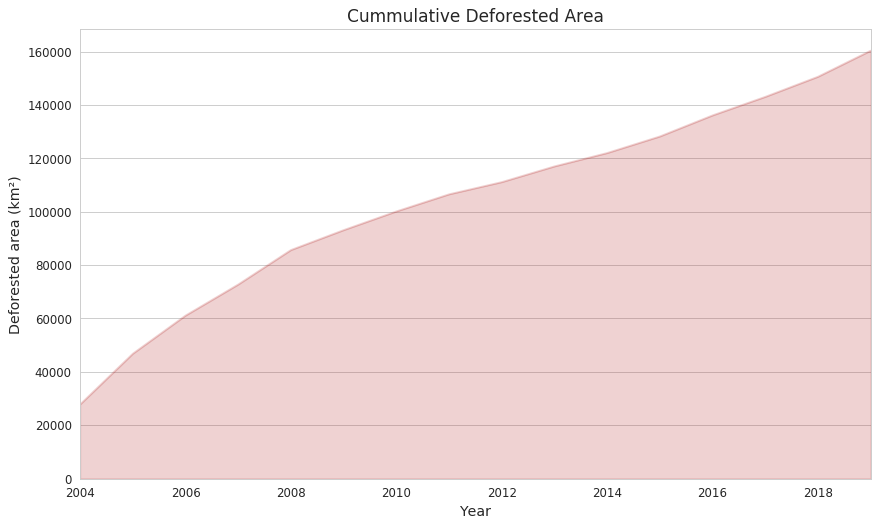

In [142]:
plt.figure(figsize=(12,7), dpi=85)
sns.set_style("whitegrid")
pivot_amazon_def.set_index("year")['total_cummulative'].plot.area(color='firebrick', alpha=0.2)

plt.ylabel("Deforested area (km²)", size="large")
plt.xlabel("Year", size="large")
plt.title("Cummulative Deforested Area", size="x-large")
plt.grid(axis='x');

From 2004 until today, more than 160k of the Amazon rainforest has been deforested <font color="firebrick"><b>which represents more than one fifth of the total deforestation area since it started centuries ago.</b></font>

#### **State**

The figure below shows the **sum** of deforested area for each state for all the years in the dataset. 

**Para** and **Mato Grosso** are the most affected states in Brazil by the Amazon deforestation, **having at least twice the total deforested area of others combined.**

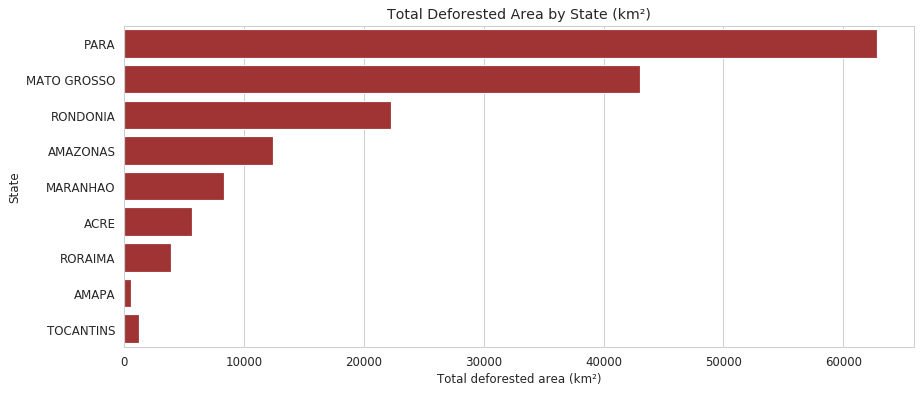

In [144]:
plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.barplot(data=amazon_def_area, x='defarea', y='state', estimator=sum, color='firebrick', order=legal_amazon, ci=None)    

plt.ylabel("State")
plt.title("Total Deforested Area by State (km²)")
plt.xlabel("Total deforested area (km²)");

---

# 3 - Comparing datasets

## 3.1. Fire Outbreaks Vs Deforested Area

In this kernel we are analyzing one of the many methods of forest degradation (fire), and the result, which is the deforestation area in km². Let's look at them together now to see how they vary with each other.

In [145]:
amazon_def_by_year = amazon_def_area.groupby("year", as_index=False).sum()

<font color="firebrick"><b>Acho que só a partir de 2003 q tem os dois é melhor</b></font>

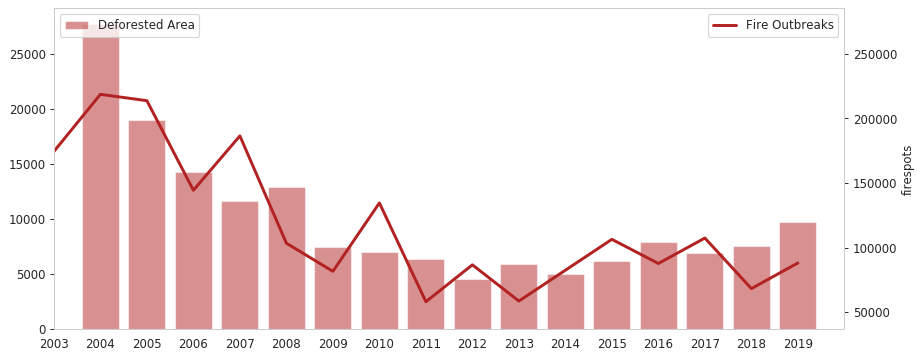

In [158]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

ax.bar(amazon_def_by_year['year'], amazon_def_by_year['defarea'], color='firebrick', alpha=0.5, label='Deforested Area')
plt.grid(False)
ax.legend(loc="upper left")

ax2 = ax.twinx()
sns.lineplot(x=amazonfires['year'], y=amazonfires['firespots'], estimator='sum', color="firebrick", ci=None, ax=ax2, label='Fire Outbreaks', lw=2.5)
ax2.set_xticks(ticks=list(range(2003, 2020)))
ax2.set_xlim(2003, 2020)
plt.grid(False)
ax2.legend();

<font color="firebrick"><b>Fala q tu vai olhar da correlação aqui, me pareceu que surgiu do nada</b></font>

In [160]:
comb = amazonfires[amazonfires['year'] > 2003].groupby('year').sum()
comb['area'] = amazon_def_by_year.groupby('year').sum()['defarea']

comb[["firespots", "area"]].corr()

,firespots,area
firespots,1.000000,0.833778
area,0.833778,1.000000


As expected, fire outbreaks have a pretty considerable correlation with the deforested area throughout the years (correlation coefficient of 0.83). But it also shows that it is not the only thing important to the forest degradation.
As previously said, fires are not the only method to degradate a forest and prepare to any type of economic activity. 

---

## 3.2 - El Niño and La Niña

Climate phenomena can be expected to influence the burning of the Amazon rainforest. For that, I decided to evaluate 2 of the most important climatic phenomena: El Niño and La Niña.

**El Niño** and **La Niña** are natural weather patterns that result from interactions between the ocean and the atmosphere. Both involve anomalies in ocean surface temperatures and atmospheric circulation, resulting in climatic extremes around the world. While El Niño is the abnormal warming of the Equatorial Pacific Ocean, La Niña is the reverse, causing the Equatorial Pacific waters to cool. Source: [EMBRAPA](https://www.embrapa.br/busca-de-publicacoes/-/publicacao/986018/de-que-modo-o-el-nino-influencia-a-amazonia-um-experimento-de-exclusao-de-chuva)

**El Niño** produces some hot and humid air masses, which generate more rainfall in some regions and drought periods in other locations, such as the Amazon, Brazilian Northeast and other countries such as Australia and Indonesia.

**La Niña** is the exactly reverse phenomenon: it represents an abnormal cooling of the waters of the Pacific Ocean due to the increased force of the trade winds. In Brazil, La Niña has the opposite effects, with the intensification of rainfall in the Amazon, the Northeast and parts of the Southeast. In addition, it causes temperatures to fall in North America and Europe.

Let's analyze their effects!

First, I extrated data of occurrences of these climatic phenomena since 1999. They are characterized by Sea surface Temperature (SST) and categorized between Weak (with a 0.5 to 0.9 SST anomaly), Moderate (1.0 to 1.4), Strong (1.5 to 1.9) and Very Strong (≥ 2.0) events.

Source: [Golden Gate Weather](https://ggweather.com/enso/oni.htm)

In [161]:
# Different encoding due to brazilian data
el_nino_la_nina_records = pd.read_excel("el_nino_la_nina_1989_2019.xlsx", encoding='LATIN1')

In [162]:
#create a new column with alpha for the graph
alpha_map = {
    "Weak":0.2,
    "Moderate": 0.3,
    "Strong": 0.4,
    "Very Strong":0.5
}

el_nino_la_nina_records['alpha'] = el_nino_la_nina_records["severity"].map(alpha_map)

In [164]:
#separating between El Niño and La Niña
el_nino_records = el_nino_la_nina_records[el_nino_la_nina_records['phenomenon'] == 'El Nino'].copy()
la_nina_records = el_nino_la_nina_records[el_nino_la_nina_records['phenomenon'] == 'La Nina'].copy()

Now, let's analyze fire outbreaks Vs these weather phenomena. the more transparent the band is, the weaker the phenomenon was in that year.

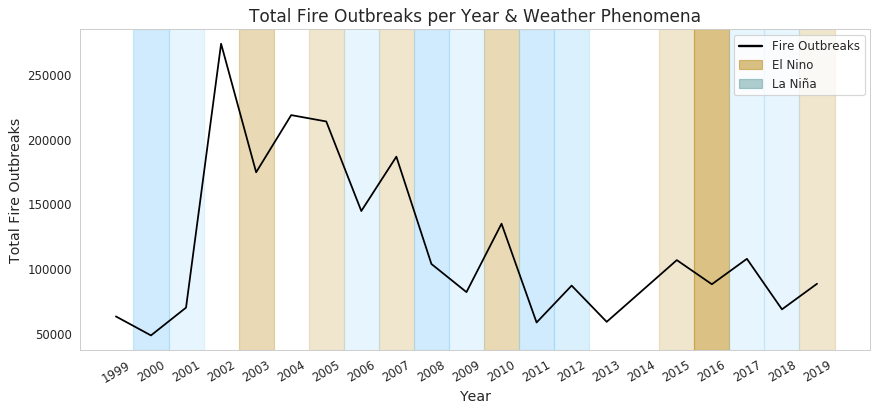

In [171]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")
for i, row in el_nino_records.iterrows(): #generate a list of rows
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='darkgoldenrod', edgecolor=None, label='El Niño')

for i, row in la_nina_records.iterrows(): #generate a list of rows
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='lightskyblue', edgecolor=None, label='La Niña')

sns.lineplot(x=amazonfires['year'], y=amazonfires['firespots'], estimator='sum', color="black", ci=None, ax=ax)
ax.grid(False)

plt.xticks(ticks=list(range(1999, 2020)), rotation=30)

plt.title("Total Fire Outbreaks per Year & Weather Phenomena", size="x-large")
plt.xlabel('Year', size="large")
plt.ylabel('Total Fire Outbreaks', size="large")

legend_elements = [Line2D([0], [0], color='black', lw=2, label='Fire Outbreaks'),
                   Patch(facecolor='darkgoldenrod', edgecolor='darkgoldenrod', label='El Nino', alpha=0.5),
                   Patch(facecolor='cadetblue', edgecolor='cadetblue', label='La Niña', alpha=0.5)]

ax.legend(handles=legend_elements);

- Analyzing this graph, it is possible to see a trend of increasing the amount of fire outbreaks in years with the occurrence of El Niño Phenomenon (in 2005, 2007, 2010, 2015, 2019), with some exceptions.
- What is strange is that in 2016, when this phenomenon was considered "Very Strong" and the strongest occurrence in the analyzed period, the number of fire outbreaks even decreased slightly from the previous year (when there was also an El Niño occurrence, but considered "Weak") and next year (when there was an El Niña occurrence, considered "Weak" as well). <font color="firebrick"><b>Acho que n precisa desse. entra em cima nos "exceptions".</b></font>
- It is also possible to see a trend of decreasing the amount of fire outbreaks in years with the occurrence of La Niña, such as in 2006, 2008, 2009, 2011, 2012 and 2018 (again, with a few exceptions). There are some exceptions as well as contradictions, such as the decrease in fire outbreaks in 2009 compared to 2008, when the same phenomenon was stronger. <font color="firebrick"><b>Acho que essa ultima frase n precisa</b></font>
- These contradictions show that, although it appears to have a correlation between these phenomena and the fires, it may not be causal or the most important factor. One thing that can happen, for example, is people taking advantage of the information about the El Niño occurrence to set fire in a criminal way.

<font color="firebrick"><b>Essa ultima conclusão pode ir nas tuas conclusões no final</b></font>

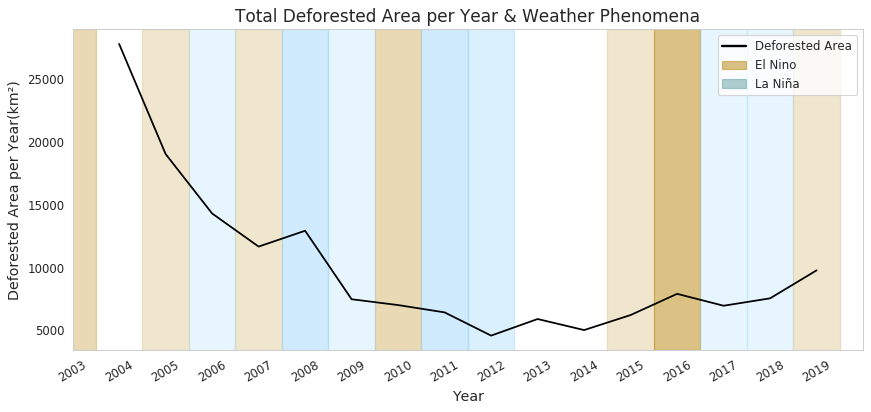

In [177]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")
for i, row in el_nino_records.iterrows(): #generate a list of rows
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='darkgoldenrod', edgecolor=None, label='El Niño')

for i, row in la_nina_records.iterrows(): #generate a list of rows
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='lightskyblue', edgecolor=None, label='La Niña')

sns.lineplot(x=amazon_def_area['year'], y=amazon_def_area['defarea'], estimator='sum', color="black", ci=None, ax=ax)
ax.grid(False)

plt.xticks(ticks=list(range(2003, 2020)), rotation=30)
ax.set_xlim(2003, 2020)

plt.title("Total Deforested Area per Year & Weather Phenomena", size="x-large")
plt.xlabel('Year', size="large")
plt.ylabel('Deforested Area per Year(km²)', size="large")

legend_elements = [Line2D([0], [0], color='black', lw=2, label='Deforested Area'),
                   Patch(facecolor='darkgoldenrod', edgecolor='darkgoldenrod', label='El Nino', alpha=0.5),
                   Patch(facecolor='cadetblue', edgecolor='cadetblue', label='La Niña', alpha=0.5)]

ax.legend(handles=legend_elements);

Unlike the fire outbreak chart, the total deforested area chart for each year does not show a clear relation to the occurrence of these climatic phenomena.

<font color="firebrick"><b>Esse gráfico achei mt legal e acho que tu podia falar masi dele, como falou no anterior. A impressão que me dá é que o el nino e la nina que são fenomenos naturais e acontecem há muitos anos de fato tem correlação com os focos de incendio. Contudo, mesmo com os incendios sasonais que acontecem por esse fenomeno natural, a amazonia existe há milhões de anos: essa parcela natural dos incendios não é a causa do desmatamento. Esse gráfico aqui mostra que o desmatamento não segue as tendencias climáticas como o anterior mostra - o que eu entendo como sendo de causas não naturais. Acho que é difícil distinguir os incendios naturais e os criminosos e a diferneça tá justamente na área desmatada</b></font>

# 4 - Conclusions

Let's finally answer the questions: 

1) Is Amazon Degradation Increasing?
- <u>Compared to the beginning of the last decade</u>, it can be firmly concluded that both the fire outbreaks and total deforested area per year **fell significantly**.
- However, <u>more recent data</u> show an increase in degraded area. The deforested area for 2019 was last recorded in 2008. The trend for next years seem to be even higher.

2) Is this deforestation criminal?
- One cannot be sure how much of this deforestation is criminal. What could be verified by this analysis was that the fires do have relation, but are not directly caused by climatic phenomena; and that the deforested area has no relation to them. It was also possible to notice records that did not comply with the behavior observed in previous years (it was the case of Roraima in 2019), which would be a strong indication that it may be criminal.

<font color="firebrick"><b>Acho que tem que escrever bem mais aqui, fazer uma lista dos achados em cada gráfico que valerem a pena mencionar. Agrupar pelos capítulos 1, 2 e 3. E no final acho que concluir com coisas relacionadas ao meu ultimo comentário</b></font>